# Time Series Analysis

The exercise this week is to work with a time series data set to try to predict the future values from those in the past.  The procedure was outlined in the lecture last week. Here I've provided a new data set describing the IBM share price from 1959 to 1960 ([available here](https://datamarket.com/data/set/2321/ibm-common-stock-closing-prices-daily-29th-june-1959-to-30th-june-1960-n255#!ds=2321&display=line)).    Your task is to model this dataset using an ARIMA model and predict future values of the series.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
## read the data from the csv file, parse dates and use the date as the index so that
## we get a time series object.  

ibm = pd.read_csv("files/ibm-common-stock-closing-prices-.csv", parse_dates=['Date'], index_col="Date", names=['Date', 'IBM'], header=0, skipfooter=3, engine='python')
# turn this into a Series 
ibm = ibm['IBM']
ibm.head()

Date
1959-06-29    445
1959-06-30    448
1959-07-01    450
1959-07-02    447
1959-07-06    451
Name: IBM, dtype: int64

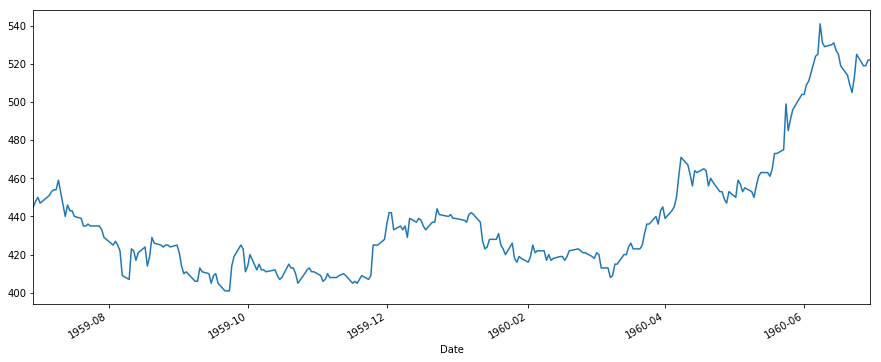

In [3]:
# simple plot of the data
ibm.plot()

In [5]:
## here's the definition of the stationarity test from the lecture

def test_stationarity(timeseries, window=12):
    """Generate rolling plots of the time series and run
    the Dickey-Fuller test for stationarity"""
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window,center=False).mean() 
    rolstd = timeseries.rolling(window=window,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

## Your Task

- test the stationarity of the data set
- if necessary, use the methods described in the lecture to make the time series stationary
- split the data into training and testing sets - eg. take the last 10 observations as test data
- fit an ARIMA model, determine the appropriate values of the parameters 
- plot the fitted data **This is your checkpoint this week**
- use the model to predict the next 10 values and compare with the test data that you have chosen (note the procedure for this is outlined in [the IBM notebook](https://datascience.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c) that was referenced in the lecture notes)

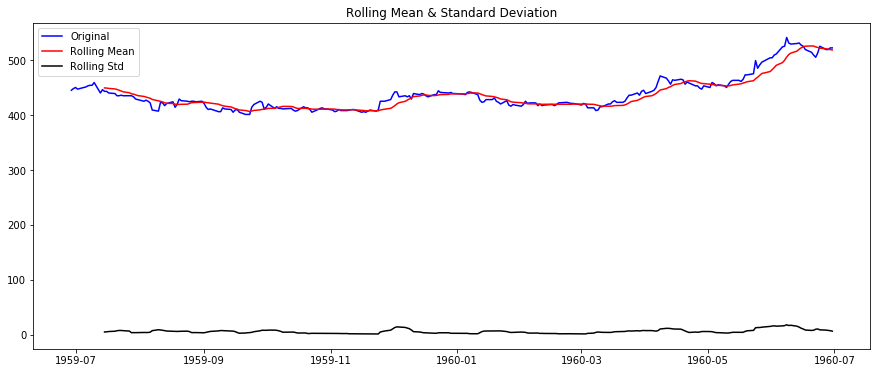

Results of Dickey-Fuller Test:
Test Statistic                   0.112808
p-value                          0.966925
#Lags Used                       0.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


In [8]:
test_stationarity(ibm)

The ibm data is not stationary - p-value is 0.966 so the hypothesis is confirmed. We can also see the increasing trend in both the mean and stdev of the data

In [35]:
## Differencing - subtract a shifted version of the series from itself

ibm_diff = ibm - ibm.shift()
plt.plot(ibm_diff)
ibm_diff.dropna(inplace = True)

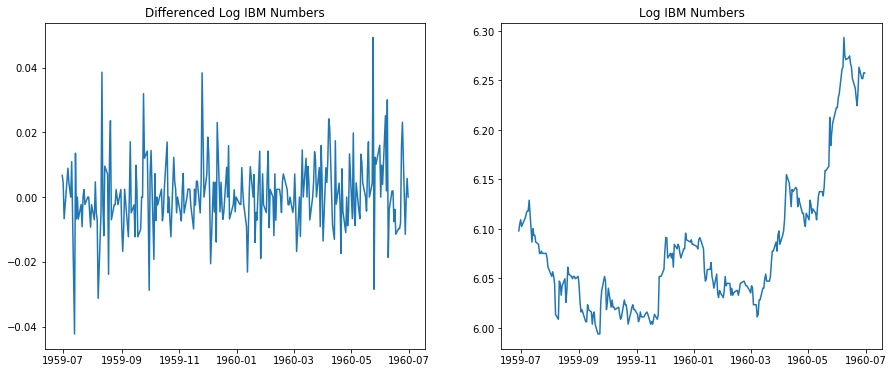

In [33]:
# Logarithm, and then the difference of the logarithm
plt.subplot(122)
ibm_log = np.log(ibm)
plt.plot(ibm_log)
plt.title("Log IBM Numbers")

plt.subplot(121)
ibm_log_diff = ibm_log - ibm_log.shift()
plt.plot(ibm_log_diff)
plt.title("Differenced Log IBM Numbers")

In [13]:
# calculate the rolling mean and substract from the original time series

ibm_avg = ibm.rolling(12).mean()
ibm_m_avg = ibm - ibm_avg

plt.plot(ibm)
plt.plot(ibm_avg, color='green')
plt.plot(ibm_m_avg, color='red')

In [14]:
from statsmodels.tsa.stattools import acf, pacf

ibm_acf = acf(ibm, nlags=20)
ibm_pacf = pacf(ibm, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(ibm_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ibm)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ibm)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122) 
plt.plot(ibm_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ibm)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ibm)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


In [28]:
train = ibm[:240]
train

Date
1959-06-29    445
1959-06-30    448
1959-07-01    450
1959-07-02    447
1959-07-06    451
1959-07-07    453
1959-07-08    454
1959-07-09    454
1959-07-10    459
1959-07-13    440
1959-07-14    446
1959-07-15    443
1959-07-16    443
1959-07-17    440
1959-07-20    439
1959-07-21    435
1959-07-22    435
1959-07-23    436
1959-07-24    435
1959-07-27    435
1959-07-28    435
1959-07-29    433
1959-07-30    429
1959-07-31    428
1959-08-03    425
1959-08-04    427
1959-08-05    425
1959-08-06    422
1959-08-07    409
1959-08-10    407
             ... 
1960-04-28    447
1960-04-29    453
1960-05-02    450
1960-05-03    459
1960-05-04    457
1960-05-05    453
1960-05-06    455
1960-05-09    453
1960-05-10    450
1960-05-11    456
1960-05-12    461
1960-05-13    463
1960-05-16    463
1960-05-17    461
1960-05-18    465
1960-05-19    473
1960-05-20    473
1960-05-23    475
1960-05-24    499
1960-05-25    485
1960-05-26    491
1960-05-27    496
1960-05-31    504
1960-06-01    504
1960-

In [30]:
test = ibm[240:]
test

Date
1960-06-10    529
1960-06-13    530
1960-06-14    531
1960-06-15    527
1960-06-16    525
1960-06-17    519
1960-06-20    514
1960-06-21    509
1960-06-22    505
1960-06-23    513
1960-06-24    525
1960-06-27    519
1960-06-28    519
1960-06-29    522
1960-06-30    522
Name: IBM, dtype: int64